In [ ]:
import sys
sys.path = ["/home/aunai/PHARE/pyphare"] + sys.path

In [ ]:
from pyphare.pharesee.run import Run
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d as gf
from numpy import polyfit
from scipy.signal import find_peaks
import glob
%matplotlib widget

In [ ]:
def get_velocities(r,times, sigma=6):
    for it,t in enumerate(times):
        Vi = r.GetVi(t, merged=True)
        Vix = Vi["Vx"][0]
        xV = Vi["Vx"][1][0]
        if sigma >0:
            v = gf(Vix(xV),sigma)
        else:
            v = Vix(xV)
        if it==0 :
            vt = np.zeros((len(v),len(times)))
        vt[:,it] = v
    return xV, vt

def get_densities(r,times, sigma=6):
    for it,t in enumerate(times):
        N = r.GetNi(t, merged=True)
        Ni = N["rho"][0]
        x = N["rho"][1][0]
        if sigma >0:
            n = gf(Ni(x),sigma)
        else:
            n = Ni(x)
        if it==0 :
            nt = np.zeros((len(n),len(times)))
        nt[:,it] = n
    return x, nt

def get_electric(r,times, sigma=6):
    for it,t in enumerate(times):
        E = r.GetE(t, merged=True)
        Ex = E["Ex"][0]
        x = E["Ex"][1][0]
        if sigma >0:
            e = gf(Ex(x),sigma)
        else:
            e = Ex(x)
        if it==0 :
            et = np.zeros((len(e),len(times)))
        et[:,it] = e
    return x, et

def profiles(times, x, Vs, vmin=None,vmax=None, marker=None, **kw):
    fig, ax = plt.subplots()
    for it,t in enumerate(times):
        ax.plot(x, Vs[:,it], label=r"t={:5.2f}".format(t), marker=marker)
        ax.set_ylim((-2.5, 2.5))
        ax.axhline(0, ls='--', color='k')
        if vmin is not None and vmax is not None:
            ax.set_ylim((vmin,vmax))
    ax.legend(ncol=4)



# Strong perturbation

We do now address the case of a velocity perturbation of the order, or larger, with respect to the sound speed $c=\sqrt{\gamma T}$. The simulations are one dimensional, along the $x$ axis

In [ ]:
root_path = "/DATA/fluidecinetique/strong_perturbation/"

In [ ]:
paths = glob.glob(root_path+"/sp*")
print(paths)

['/DATA/fluidecinetique/strong_perturbation/sp', '/DATA/fluidecinetique/strong_perturbation/spNoPe', '/DATA/fluidecinetique/strong_perturbation/spPe0.8']


## With electron temperature Te=0.2

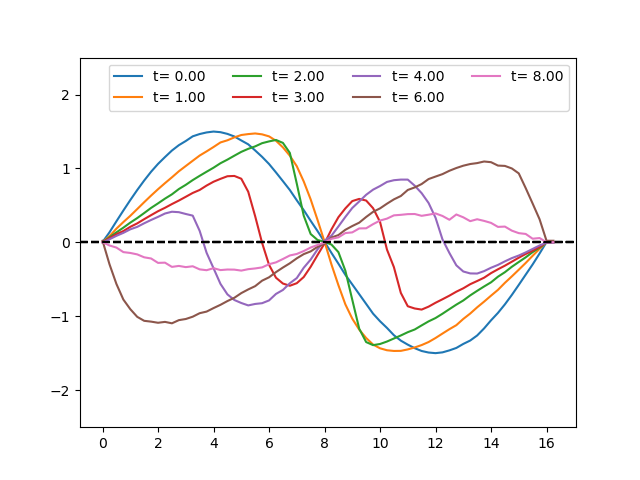

In [ ]:
irun = 0
r = Run(paths[irun])
times   = np.asarray((0,1,2,3,4,6,8))
x, Vs   = get_velocities(r,times, sigma=0)
profiles(times, x, Vs)

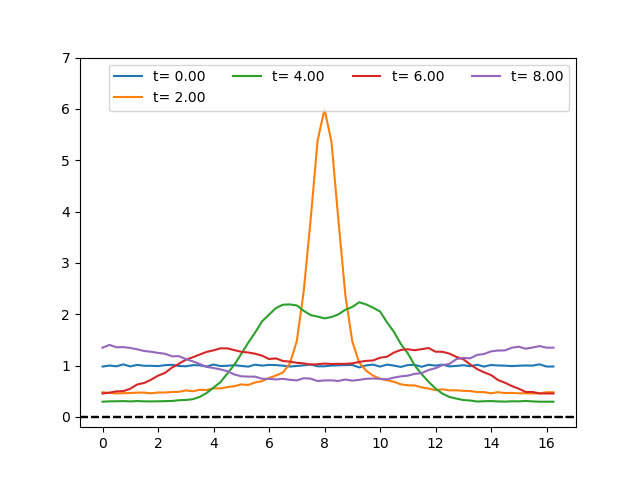

In [36]:
irun=0
r = Run(paths[irun])
times   = np.asarray((0,2,4,6,8))
x, Ns   = get_densities(r,times, sigma=0)
profiles(times, x, Ns, -0.2, 7)

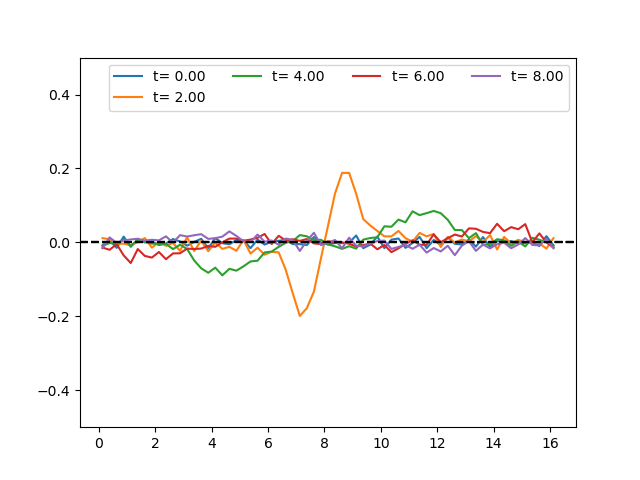

In [37]:
irun=0
r = Run(paths[irun])
times   = np.asarray((0,2,4,6,8))
x, E   = get_electric(r,times, sigma=0)
profiles(times, x, E, -0.5, 0.5)

/opt/conda/lib/python3.9/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=93,114 m=10176 fp=0.000012 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


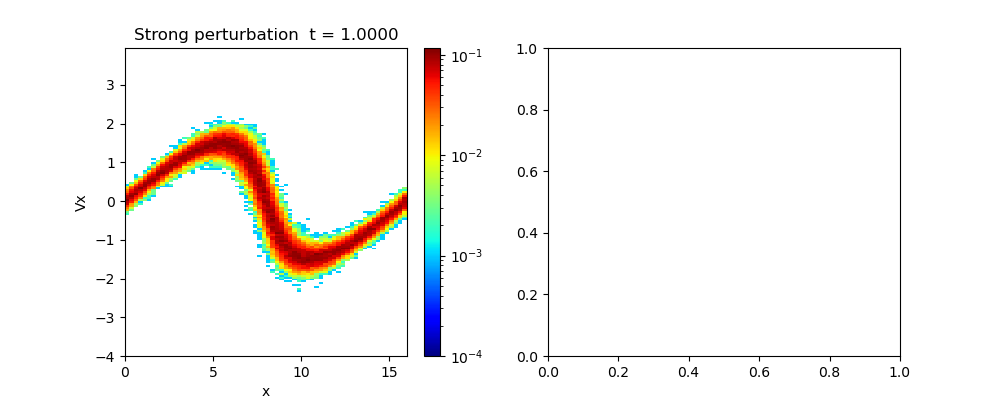

In [39]:
t=1
ions = r.GetParticles(t, ["protons",])
fig, (ax1,ax2) = plt.subplots(figsize=(10,4), ncols=2)
p,f=ions.dist_plot(axis=("x", "Vx"), # default [Vx,Vy]
               ax=ax1,            # default creates the figure
               norm = 0.4,     # max value, min is 0
                finest=True,  # only consider finest particles possible
               # levels=(0,)    # default is (0,), tuple of all levels to overplot
               #bulk=True,        # draw line(s) at mean vel. on vel. axis
               #xlim=(0,20),     # default takes full data range
               #ylim=(-2,2),     # default takes full data range
               #sigma = (1,1),   # gaussian filter 2D
               #filename=myImage.png, # will save result in file
               gaussian_filter_sigma=0,
               vmin=-4,vmax=4,
               dv=0.05,
               title="Strong perturbation  t = {:.4f}".format(t), # figure title
               #xlabel="my x label", # default is name of chosen axis[0]
               #ylabel= "my y label", # default is name of chosen axis[1]
               # kde = True,     # default False, draws kernel density estimate contours               
              )

In [40]:
xcuts = (8,10.35)
for xcut in xcuts:
    ax1.axvline(xcut,  ls="--")
    d,xbin,ybin= f[2:5]
    ax2.plot(ybin, d(xcut, ybin))

/opt/conda/lib/python3.9/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=94,113 m=10176 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


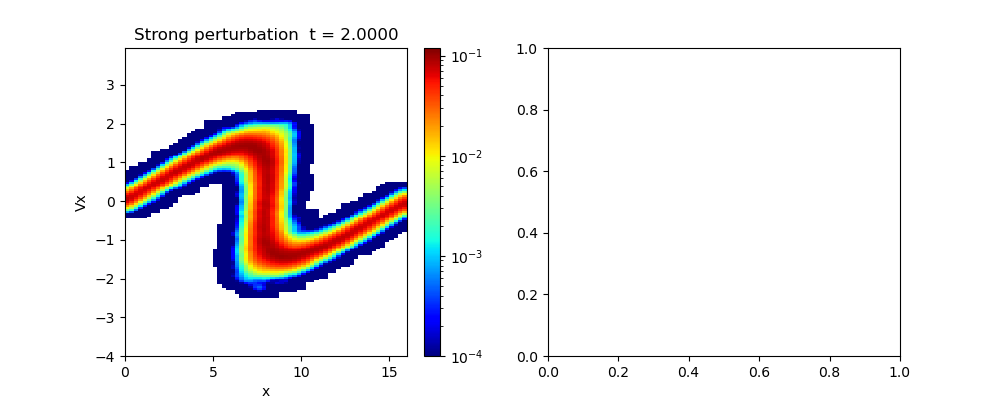

In [17]:
t=2
ions = r.GetParticles(t, ["protons",])
fig, (ax1,ax2) = plt.subplots(figsize=(10,4), ncols=2)
p,f=ions.dist_plot(axis=("x", "Vx"), # default [Vx,Vy]
               ax=ax1,            # default creates the figure
               norm = 0.4,     # max value, min is 0
                finest=True,  # only consider finest particles possible
               # levels=(0,)    # default is (0,), tuple of all levels to overplot
               #bulk=True,        # draw line(s) at mean vel. on vel. axis
               #xlim=(0,20),     # default takes full data range
               #ylim=(-2,2),     # default takes full data range
               #sigma = (1,1),   # gaussian filter 2D
   ensity VA0 = B0/√mpn0μ0. It thus follows that
the distances are normalized to the ion inertial length δi0 = VA0/Ωci0ensity VA0 = B0/√mpn0μ0. It thus follows that
the distances are normalized to the ion inertial length δi0 = VA0/Ωci0            #filename=myImage.png, # will save result in file
               gaussian_filter_sigma=1,
               vmin=-4,vmax=4,
               dv=0.05,
               title="Strong perturbation  t = {:.4f}".format(t), # figure title
               #xlabel="my x label", # default is name of chosen axis[0]
               #ylabel= "my y label", # default is name of chosen axis[1]
               # kde = True,     # default False, draws kernel density estimate contours               
              )

In [18]:
xcuts = (8,10.35)
for xcut in xcuts:
    ax1.axvline(xcut,  ls="--")
    d,xbin,ybin= f[2:5]
    ax2.plot(ybin, d(xcut, ybin))

/opt/conda/lib/python3.9/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=95,112 m=10176 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


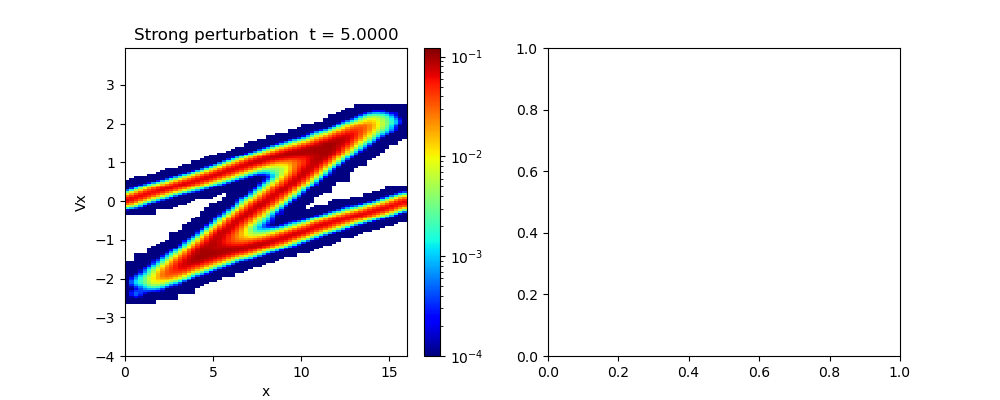

In [19]:
t=5
ions = r.GetParticles(t, ["protons",])
fig, (ax1,ax2) = plt.subplots(figsize=(10,4), ncols=2)
p,f=ions.dist_plot(axis=("x", "Vx"), # default [Vx,Vy]
               ax=ax1,            # default creates the figure
               norm = 0.4,     # max value, min is 0
                finest=True,  # only consider finest particles possible
               # levels=(0,)    # default is (0,), tuple of all levels to overplot
               #bulk=True,        # draw line(s) at mean vel. on vel. axis
               #xlim=(0,20),     # default takes full data range
               #ylim=(-2,2),     # default takes full data range
               #sigma = (1,1),   # gaussian filter 2D
               #filename=myImage.png, # will save result in file
               gaussian_filter_sigma=1,
               vmin=-4,vmax=4,
               dv=0.05,
               title="Strong perturbation  t = {:.4f}".format(t), # figure title
               #xlabel="my x label", # default is name of chosen axis[0]
               #ylabel= "my y label", # default is name of chosen axis[1]
               # kde = True,     # default False, draws kernel density estimate contours               
              )

In [20]:
xcuts = (8,10.35)
for xcut in xcuts:
    ax1.axvline(xcut,  ls="--")
    d,xbin,ybin= f[2:5]
    ax2.plot(ybin, d(xcut, ybin))

## Without electron temperature Te=0

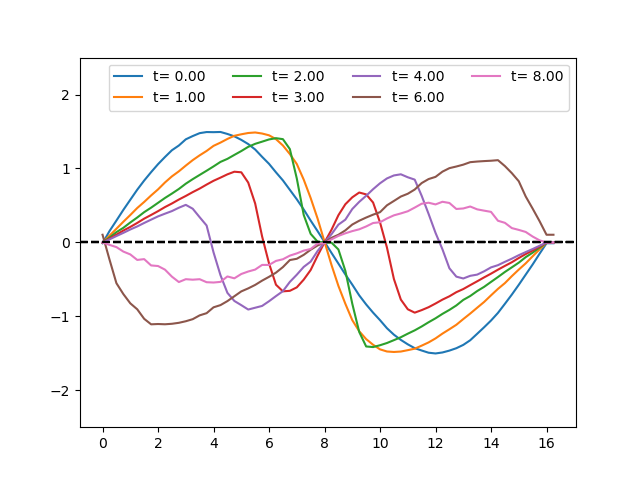

In [16]:
irun = 1
r = Run(paths[irun])
times   = np.asarray((0,1,2,3,4,6,8))
x, Vs   = get_velocities(r,times, sigma=0)
profiles(times, x, Vs)

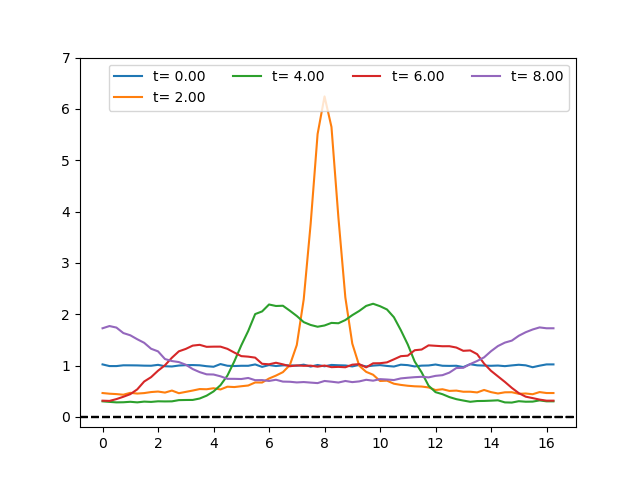

In [17]:
irun=1
r = Run(paths[irun])
times   = np.asarray((0,2,4,6,8))
x, Ns   = get_densities(r,times, sigma=0)
profiles(times, x, Ns, -0.2, 7)

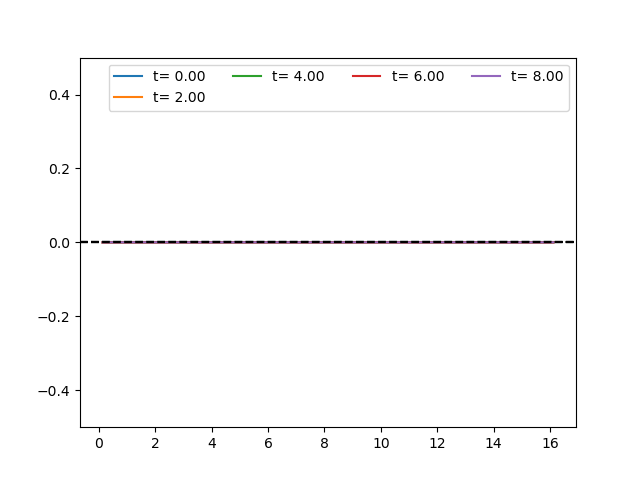

In [18]:
irun=1
r = Run(paths[irun])
times   = np.asarray((0,2,4,6,8))
x, E   = get_electric(r,times, sigma=0)
profiles(times, x, E, -0.5, 0.5)

/opt/conda/lib/python3.9/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=95,112 m=10176 fp=0.000009 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


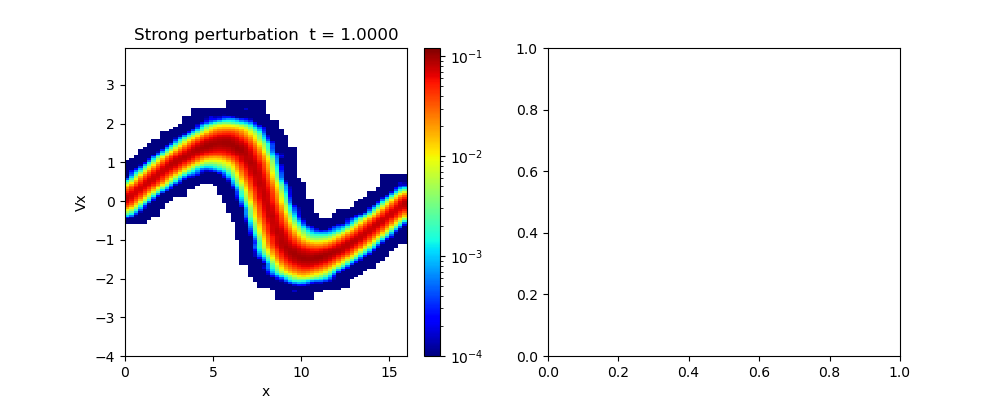

In [25]:
t=1
ions = r.GetParticles(t, ["protons",])
fig, (ax1,ax2) = plt.subplots(figsize=(10,4), ncols=2)
p,f=ions.dist_plot(axis=("x", "Vx"), # default [Vx,Vy]
               ax=ax1,            # default creates the figure
               norm = 0.4,     # max value, min is 0
                finest=True,  # only consider finest particles possible
               # levels=(0,)    # default is (0,), tuple of all levels to overplot
               #bulk=True,        # draw line(s) at mean vel. on vel. axis
               #xlim=(0,20),     # default takes full data range
               #ylim=(-2,2),     # default takes full data range
               #sigma = (1,1),   # gaussian filter 2D
               #filename=myImage.png, # will save result in file
               gaussian_filter_sigma=1,
               vmin=-4,vmax=4,
               dv=0.05,
               title="Strong perturbation  t = {:.4f}".format(t), # figure title
               #xlabel="my x label", # default is name of chosen axis[0]
               #ylabel= "my y label", # default is name of chosen axis[1]
               # kde = True,     # default False, draws kernel density estimate contours               
              )

In [27]:
xcuts = (8,10.35)
for xcut in xcuts:
    ax1.axvline(xcut,  ls="--")
    d,xbin,ybin= f[2:5]
    ax2.plot(ybin, d(xcut, ybin))

/opt/conda/lib/python3.9/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=89,119 m=10176 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


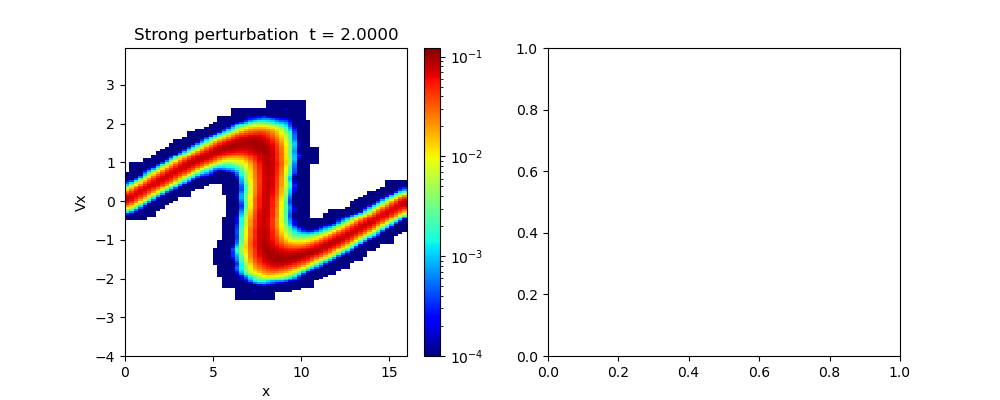

In [28]:
t=2
ions = r.GetParticles(t, ["protons",])
fig, (ax1,ax2) = plt.subplots(figsize=(10,4), ncols=2)
p,f=ions.dist_plot(axis=("x", "Vx"), # default [Vx,Vy]
               ax=ax1,            # default creates the figure
               norm = 0.4,     # max value, min is 0
                finest=True,  # only consider finest particles possible
               # levels=(0,)    # default is (0,), tuple of all levels to overplot
               #bulk=True,        # draw line(s) at mean vel. on vel. axis
               #xlim=(0,20),     # default takes full data range
               #ylim=(-2,2),     # default takes full data range
               #sigma = (1,1),   # gaussian filter 2D
               #filename=myImage.png, # will save result in file
               gaussian_filter_sigma=1,
               vmin=-4,vmax=4,
               dv=0.05,
               title="Strong perturbation  t = {:.4f}".format(t), # figure title
               #xlabel="my x label", # default is name of chosen axis[0]
               #ylabel= "my y label", # default is name of chosen axis[1]
               # kde = True,     # default False, draws kernel density estimate contours               
              )

In [29]:
xcuts = (8,10.35)
for xcut in xcuts:
    ax1.axvline(xcut,  ls="--")
    d,xbin,ybin= f[2:5]
    ax2.plot(ybin, d(xcut, ybin))

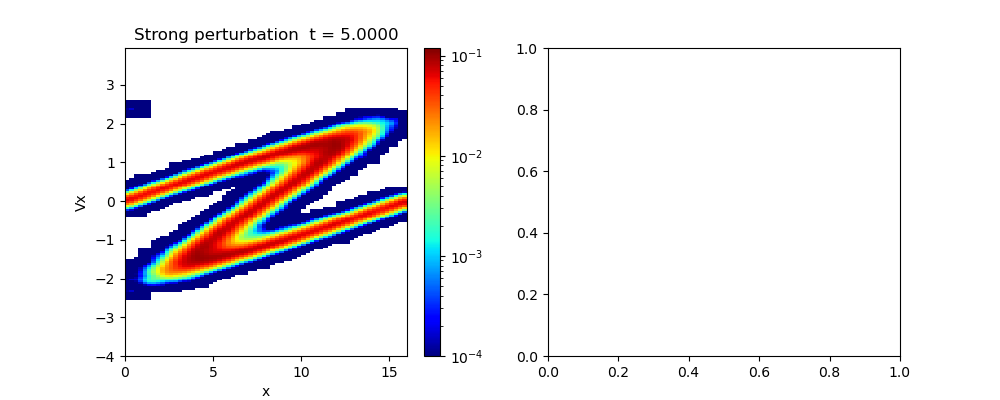

In [32]:
t=5
ions = r.GetParticles(t, ["protons",])
fig, (ax1,ax2) = plt.subplots(figsize=(10,4), ncols=2)
p,f=ions.dist_plot(axis=("x", "Vx"), # default [Vx,Vy]
               ax=ax1,            # default creates the figure
               norm = 0.4,     # max value, min is 0
                finest=True,  # only consider finest particles possible
               # levels=(0,)    # default is (0,), tuple of all levels to overplot
               #bulk=True,        # draw line(s) at mean vel. on vel. axis
               #xlim=(0,20),     # default takes full data range
               #ylim=(-2,2),     # default takes full data range
               #sigma = (1,1),   # gaussian filter 2D
               #filename=myImage.png, # will save result in file
               gaussian_filter_sigma=1,
               vmin=-4,vmax=4,
               dv=0.05,
               title="Strong perturbation  t = {:.4f}".format(t), # figure title
               #xlabel="my x label", # default is name of chosen axis[0]
               #ylabel= "my y label", # default is name of chosen axis[1]
               # kde = True,     # default False, draws kernel density estimate contours               
              )

In [33]:
xcuts = (8,10.35)
for xcut in xcuts:
    ax1.axvline(xcut,  ls="--")
    d,xbin,ybin= f[2:5]
    ax2.plot(ybin, d(xcut, ybin))

## profiles as a function of Te

In [22]:
paths

['/DATA/fluidecinetique/strong_perturbation/sp',
 '/DATA/fluidecinetique/strong_perturbation/spNoPe',
 '/DATA/fluidecinetique/strong_perturbation/spPe0.8']

In [ ]:
r = Run(paths[0])
times   = np.asarray((0,2,4,6,8))
x, Ns   = get_densities(r,times, sigma=0)
profiles(times, x, Ns, -0.2, 7)